# <font color='red'>Clustering Assignment</font>

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
	
4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ 
where N= number of clusters 
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

<br>

In [1]:
!pip install networkx==2.3

     |████████████████████████████████| 1.7 MB 22.2 MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556009 sha256=dc38c6db020feef812a8e6d883a15bcb3ac5d80cfbb13d4f9340f5b197d8bc8d
  Stored in directory: /root/.cache/pip/wheels/44/e6/b8/4efaab31158e9e9ca9ed80b11f6b11130bac9a9672b3cbbeaf
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
pip install StellarGraph

     |████████████████████████████████| 435 kB 23.8 MB/s 


In [4]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

# #Lets get the datset that has givem movie_actors_network

In [6]:
data=pd.read_csv('movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [48]:
#Defining Edges of the Graph and considering them from tuple
edges = [tuple(x) for x in data.values.tolist()]

In [49]:
#Lets add Nodes for the Grapg as we already defined edges for them
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [9]:
A = list(nx.connected_component_subgraphs(B))[0]

In [50]:
#Lets print number of nodes and edges got formed from the dataset that has given
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


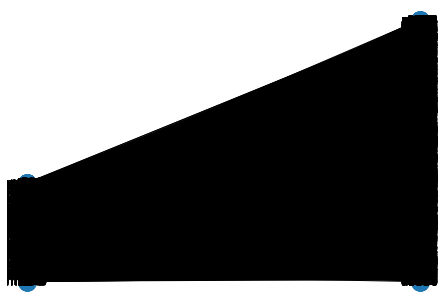

In [11]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [12]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [51]:
#https://www.geeksforgeeks.org/random-walk-implementation-python/
# Creating the random walker 
#https://stellargraph.readthedocs.io/en/stable/demos/embeddings/metapath2vec-embeddings.html
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # max length of a random walk
               n=1,        # no of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [52]:
#lets convert all the words formats in vector forms
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [53]:
model.wv.vectors.shape  # Here 128-dimensional vector for each node in the graph

(4703, 128)

In [54]:
# lets Retrieve node embeddings and corresponding subjects....
node_ids = model.wv.index2word  # list of node ids
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality..
node_targets = [ A.node[node_id]['label'] for node_id in node_ids]

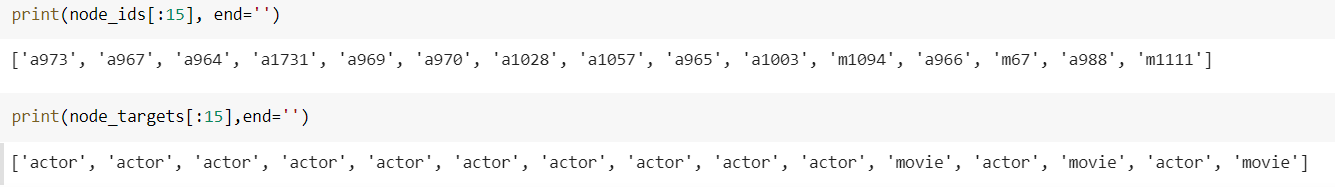

In [17]:
print(node_ids[:15],end='')

['a973', 'a967', 'a964', 'a1731', 'a970', 'a969', 'a1028', 'm1094', 'a1003', 'a965', 'a1057', 'm1111', 'm67', 'a966', 'a959']

In [18]:
#lets print number of node targets
print("")
print(node_targets[:15],end='')



['actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'movie', 'actor', 'actor', 'actor', 'movie', 'movie', 'actor', 'actor']

In [55]:
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
    actor_nodes,movie_nodes=[],[]
    actor_embeddings,movie_embeddings=[],[]
    # spliting the node_embeddings into actor_embeddings and movie_embeddings based on node_ids that we have created
    # using node_embeddings and node_targets, we can even extract actor_embedding and movie embedding...
    # By using node_ids and node_targets, we can even extract actor_nodes and movie nodes....
    for i,x in enumerate(node_ids):
      if node_targets[i]=='actor':
        actor_nodes.append(x)
    for i,x in enumerate(node_ids):
      if node_targets[i]=='movie':
        movie_nodes.append(x)
    for i,x in enumerate(node_embeddings):
      if node_targets[i]=='actor':
        actor_embeddings.append(x)
    for i,x in enumerate(node_embeddings):
      if node_targets[i]=='movie':
        movie_embeddings.append(x)

    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings


In [56]:
#lets split the Data 
actor_nodes,movie_nodes,actor_embeddings,movie_embeddings = data_split(node_ids,node_targets,node_embeddings)

In [21]:
print(len(actor_nodes))

3411


<font color='cyan'>Grader function - 1</font>

In [22]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Grader function - 2</font>

In [23]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

In [25]:
actor_targets=[ x for x in node_targets if x=='actor']
movie_targets=[ x for x in node_targets if x=='movie']

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [27]:
def cost1(graph,number_of_clusters):

    #calculating cost1'''
  num= max([len(x) for x in list(nx.connected_components(graph))])
  Total_Nodes=graph.number_of_nodes()
  return (1/number_of_clusters)*num/Total_Nodes


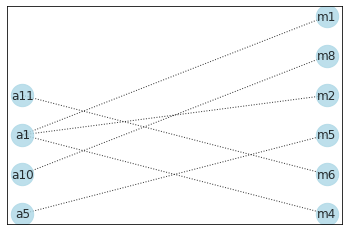

In [57]:
#getting the graph of whole networ using networkx module......
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

<font color='cyan'>Grader function - 3</font>

In [29]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) 
    return True
grader_cost1(graded_cost1)

True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [30]:
def cost2(graph,number_of_clusters):

    #calculating cost2'''
  degree = graph.degree()
  nodes = list(graph.nodes())
  unique_nodes = []
  for i in nodes:
    if i not in unique_nodes:
      unique_nodes.append(i)
  summation = 0
  for i in degree:
    if 'a' in i[0]:
      summation+=i[1]
  movie_nodes=0
  for i in unique_nodes:
    if 'm' in i:
      movie_nodes+=1
  return (1/number_of_clusters)*summation/movie_nodes


<font color='cyan'>Grader function - 4</font>

In [31]:
graded_cost2=cost2(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

<font color='blue'>Grouping similar actors</font>

In [36]:
number_of_clusters = [3, 5, 10, 30, 50, 100, 200, 500]
cost = []
for cl in number_of_clusters:
 kmeans = KMeans(n_clusters=cl)
 kmeans.fit(actor_embeddings)
 cluster_number_for_data_point = kmeans.labels_
 list_of_all_cluster=[]
 unique = np.unique(cluster_number_for_data_point)
 dict_of_actor_nodes = dict(zip(actor_nodes, cluster_number_for_data_point))
 for number in unique:
   cluster=[]
 for node, cluster_number in dict_of_actor_nodes.items():
   if cluster_number == number:
     cluster.append(node)
   list_of_all_cluster.append(cluster)
 cost_1=0
 cost_2=0
 for cluster_ in list_of_all_cluster:
   G= nx.Graph()
   for actor_node in cluster_:
     sub_graph = nx.ego_graph(B,actor_node)
     G.add_nodes_from(sub_graph.nodes())
     G.add_edges_from(sub_graph.edges())
   cost_1+=cost1(G,cl)
   cost_2+=cost2(G,cl)
 print(cost_1*cost_2)
 cost.append(cost_1*cost_2)

3764134.4174815724
515083.01906030875
267888.5080381733
25409.597586203927
8000.844928760912
1163.4921000001216
290.8730250000304
23.9970245624989


In [37]:
best_cluster=number_of_clusters[cost.index(max(cost))]


In [38]:
#number of Kmeans Clusters....
algo=KMeans(n_clusters=best_cluster)
algo.fit(actor_embeddings)

KMeans(n_clusters=3)

<font color='blue'>Displaying similar actor clusters</font>

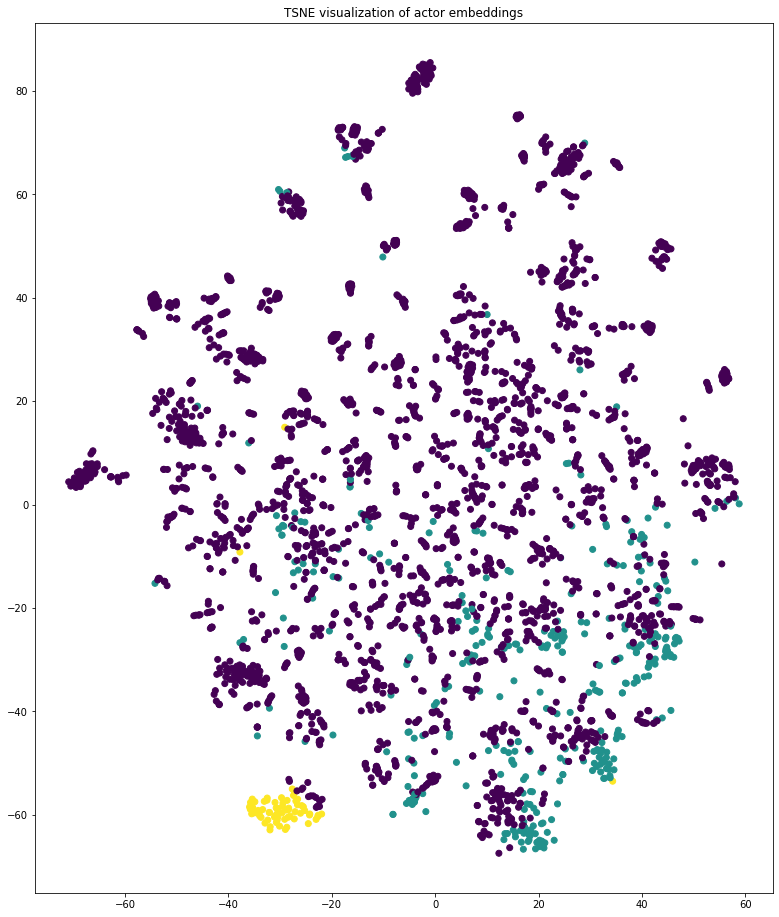

In [41]:
#lets use TSNE with the help of Sklearn
from sklearn.manifold import TSNE
transform = TSNE
trans = transform(n_components=2)
actor_embeddings_2d = trans.fit_transform(actor_embeddings)
label_map = { l: i for i, l in enumerate(np.unique(actor_targets))}
actor_colours = [ label_map[target] for target in actor_targets]
plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(actor_embeddings_2d[:,0],actor_embeddings_2d[:,1],c=algo.predict(actor_embeddings))
plt.title('{} visualization of actor embeddings'.format(transform.__name__))
plt.show()

<font color='blue'>Grouping similar movies</font>

In [42]:
cluster_list=[3,5,10,30,50,100,200,500]
Cost_movies=[]
for cluster in cluster_list:
  algo_m=KMeans(n_clusters=cluster)
  algo_m.fit(movie_embeddings)
  label_m=algo_m.labels_
  dic=dict(zip(movie_nodes,label_m))
  c1=0
  c2=0
  for i in label_m:
    ac_node = [k for k,v in dic.items() if v == i]
    G1=nx.Graph()
    for n in range(len(ac_node)):
      sub_graph1 = nx.ego_graph(A,node_ids[n])
      G1.add_nodes_from(sub_graph1.nodes)
      G1.add_edges_from(sub_graph1.edges())
    c1+=cost1(G1,cluster)
    c2+=cost2(G1,cluster)
  print(c1*c2)
  Cost_movies.append(c1*c2)

1164804.88819142
357792.63769194606
77616.87231410101
6599.677377353273
2036.2201280541808
451.71919964291226
97.10512671425177
10.927438307722747


In [43]:
best_cluster=cluster_list[Cost_movies.index(max(Cost_movies))]


In [45]:
kmeans=KMeans(n_clusters=best_cluster)
kmeans.fit(movie_embeddings)


KMeans(n_clusters=3)

<font color='blue'>Displaying similar movie clusters</font>

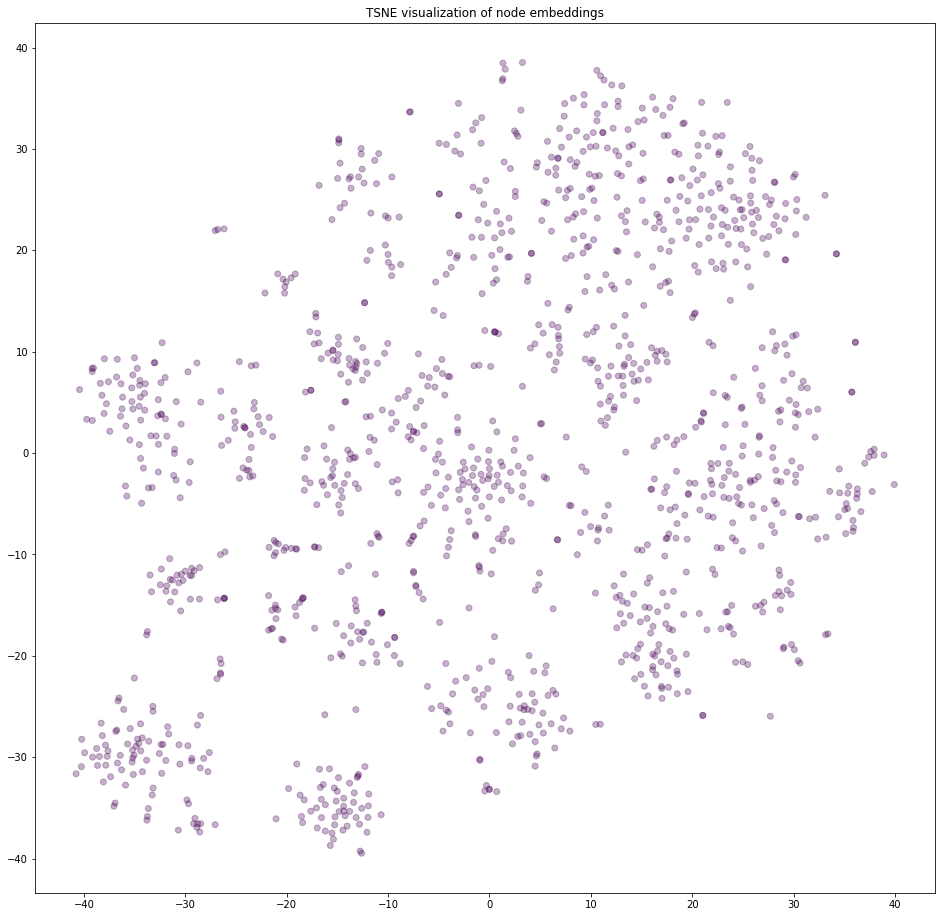

In [47]:
from sklearn.manifold import TSNE
transform = TSNE
trans_ = transform(n_components=2)
movie_embeddings_2d = trans_.fit_transform(movie_embeddings)
import numpy as np
# drawing the points
label_map = { l: i for i, l in enumerate(np.unique(movie_targets))}
node_colours = [ label_map[target] for target in movie_targets]
plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(movie_embeddings_2d[:,0],movie_embeddings_2d[:,1],c=node_colours, alpha=0.3)
plt.title('{} visualization of node embeddings'.format(transform.__name__))
plt.show()